<a href="https://colab.research.google.com/github/ElenJ/XAI/blob/main/tutorial_credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting and mitigating age bias on credit decisions

authors/source: https://github.com/Trusted-AI/AIF360/blob/main/examples/tutorial_credit_scoring.ipynb

Script highlights basic functionality of AI Fairness 360.

### Biases and Machine Learning
A machine learning model makes predictions of an outcome for a particular instance. (Given an instance of a loan application, predict if the applicant will repay the loan.) The model makes these predictions based on a training dataset, where many other instances (other loan applications) and actual outcomes (whether they repaid) are provided. Thus, a machine learning algorithm will attempt to find patterns, or generalizations, in the training dataset to use when a prediction for a new instance is needed. (For example, one pattern it might discover is "if a person has salary > USD 40K and has outstanding debt < USD 5, they will repay the loan".) In many domains this technique, called supervised machine learning, has worked very well.

However, sometimes the patterns that are found may not be desirable or may even be illegal. For example, a loan repay model may determine that age plays a significant role in the prediction of repayment because the training dataset happened to have better repayment for one age group than for another. This raises two problems: 1) the training dataset may not be representative of the true population of people of all age groups, and 2) even if it is representative, it is illegal to base any decision on a applicant's age, regardless of whether this is a good prediction based on historical data.

AI Fairness 360 is designed to help address this problem with _fairness metrics_ and _bias mitigators_.  **Fairness metrics can be used to check for bias in machine learning workflows.  Bias mitigators can be used to overcome bias in the workflow to produce a more fair outcome.**

The loan scenario describes an intuitive example of illegal bias. However, not all undesirable bias in machine learning is illegal it may also exist in more subtle ways.  For example, a loan company may want a diverse portfolio of customers across all income levels, and thus, will deem it undesirable if they are making more loans to high income levels over low income levels.  Although this is not illegal or unethical, it is undesirable for the company's strategy.

As these two examples illustrate, a bias detection and/or mitigation toolkit needs to be tailored to the particular bias of interest.  More specifically, it needs to know the attribute or attributes, called _protected attributes_, that are of interest: race is one example of a _protected attribute_ and age is a second.

### The Machine Learning Workflow
Bias can enter a machine learning model at 3 levels:

1)  The training data set may be biased in that its outcomes may be biased towards particular kinds of instances.  

2)  The algorithm that creates the model may be biased in that it may generate models that are weighted towards particular features in the input.

3)  The test data set may be biased in that it has expectations on correct answers that may be biased.  

These three points in the machine learning process represent points for testing and mitigating bias.  In AI Fairness 360 codebase, we call these points

1) _pre-processing_

2) _in-processing_

3) _post-processing_

### AI Fairness 360
AI Fairness 360 (`aif360`) can be utilized to detect and mitigate bias.  We will use the German credit dataset, splitting it into a training and test dataset.  We will look for bias in the creation of a machine learning model to predict if an applicant should be given credit based on various features from a typical credit application.  The protected attribute will be "Age", with "1" (older than or equal to 25) and "0" (younger than 25) being the values for the privileged and unprivileged groups, respectively.

For this first tutorial, we will check for bias in the initial training data, mitigate the bias, and recheck.  More sophisticated machine learning workflows are given in the author tutorials and demo notebooks in the codebase of the [aif360 github](https://github.com/Trusted-AI/AIF360/tree/main)

Here are the steps involved
#### Step 1: Write import statements
#### Step 2: Set bias detection options, load dataset, and split between train and test
#### Step 3: Compute fairness metric on original training dataset
#### Step 4: Mitigate bias by transforming the original dataset
#### Step 5: Compute fairness metric on transformed training dataset



In [ ]:
!pip install aif360
!pip install 'aif360[inFairness]'
!pip install 'aif360[Reductions]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.7 MB/s eta 0:00:00


### Step 1 Import Statements
As with any python program, the first step will be to import the necessary packages.  Below we import several components from the `aif360` package.  We import the GermanDataset, metrics to check for bias, and classes related to the algorithm we will use to mitigate bias.

In [ ]:
# Load all necessary packages
import sys
sys.path.insert(1, "../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

from aif360.datasets import GermanDataset # this is not working?
from aif360.datasets import StandardDataset

from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing

from IPython.display import Markdown, display

### Step 2 Load dataset, specifying protected attribute, and split dataset into train and test
In Step 2 we load the initial dataset, setting the protected attribute to be age.  We then splits the original dataset into training and testing datasets.  Although we will use only  the training dataset in this tutorial, a normal workflow would also use a test dataset for assessing the efficacy (accuracy, fairness, etc.) during the development of a machine learning model.  Finally, we set two variables (to be used in Step 3) for the privileged (1) and unprivileged (0) values for the age attribute.  These are key inputs for detecting and mitigating bias, which will be Step 3 and Step 4.  

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:
# Combine features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# rename some columns to make it clearer later on
df = df.rename(columns={'Attribute13': 'age',
                        'class': 'credit'})
# Define column names
protected_attribute_names = ['age'] # which is age
label_name = 'credit'  # 'class' is the column name for your target, i.e. credit

In [ ]:
# Can we detect any biases w.r.t age and credit? is any group priviliged?
# Bin the 'age' column into 25-year intervals
# We need to define the bins. Find the min and max age first:
min_age = df['age'].min()
max_age = df['age'].max()
print(f"Min age: {min_age}, Max age: {max_age}")

# Define bins based on the tutorial's split point (25) and 25-year intervals
# Let's create bins: <25, 25-50, 50+
# Bin edges should include the maximum value, so we might need to adjust the upper bound.
bins = [df['age'].min() -1, 24, 49, df['age'].max()] # -1 to include min age if it's 0
labels = ['<25', '25-49', '50+']

# Create a new column for age bins
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Group by the age bins and calculate the mean credit score for each bin
# Remember 'credit' is 1 for good credit, 0 for bad credit
credit_by_age_bin = df.groupby('age_bin')['credit'].mean().reset_index()

# Rename the column for clarity
credit_by_age_bin = credit_by_age_bin.rename(columns={'credit': 'mean_credit_score'})

# Display the results
print("\nMean Credit Score by Age Bin:")
print(credit_by_age_bin)

Min age: 19, Max age: 75

Mean Credit Score by Age Bin:
  age_bin  mean_credit_score
0     <25           1.409396
1   25-49           1.282369
2     50+           1.272000


<ipython-input-20-08646bbd47a1>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_by_age_bin = df.groupby('age_bin')['credit'].mean().reset_index()


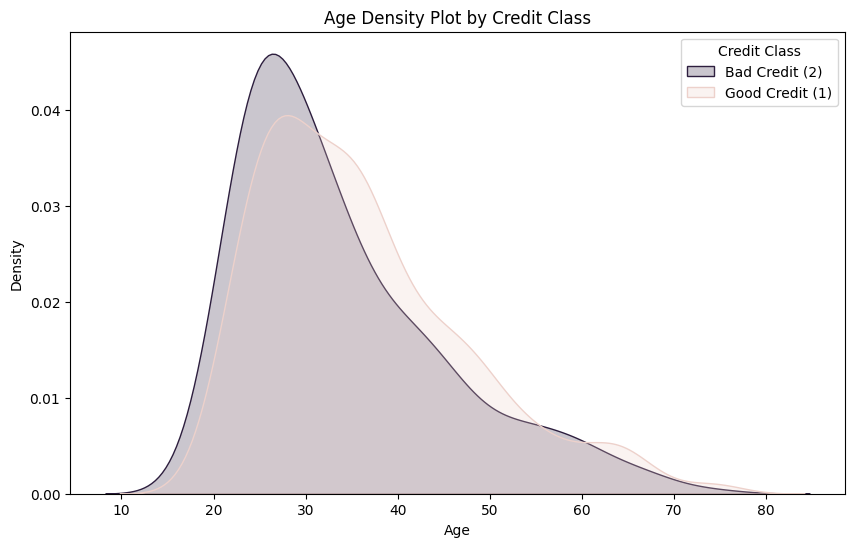

In [ ]:
# Generate the density plot
plt.figure(figsize=(10, 6)) # Set the figure size for better readability
sns.kdeplot(data=df, x='age', hue='credit', fill=True, common_norm=False)

# Add titles and labels
plt.title('Age Density Plot by Credit Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Credit Class', labels=['Bad Credit (2)', 'Good Credit (1)']) # Add a legend

# Show the plot
plt.show()

# Interpretation of the plot:
# Observe the shape and position of the density curves for credit class 2 (bad credit)
# and credit class 1 (good credit).
# If the density curve for good credit (1) is shifted towards higher ages, or has a larger area
# under the curve at older ages compared to the density curve for bad credit (2),
# it visually confirms that older individuals are more likely to have good credit in this dataset.
# This provides visual evidence for the age bias observed with the mean difference metric.

The next steps revolve around generating a dataset for AIF360. We will need to define the protected attributes to prevent discrimination and indicate the proviliged classes within this attribute. AIF360's function call also requires the "positive" target to be provided (favorable_classes). In addition, StandardDataset() needs to know which features are categorical. Lastly, we can omit features from the analysis. We will do so with "sex" to keep the example simple.

In [ ]:
# Determine favorable classes. You need to inspect your 'Credit' column
# to know which value represents a favorable outcome (e.g., 1 for good credit)
# Replace '1' with the actual value representing a favorable outcome in your data
favorable_classes = [1] # 1 represents a favorable outcome, i.e. credit

# Identify categorical features
# Get the data types of all columns
column_dtypes = df.dtypes
# Filter column names where the dtype is 'object' or 'category'
categorical_cols = [col for col in column_dtypes.index if column_dtypes[col] == 'object' or column_dtypes[col] == 'category']

# Print the list of categorical column names
print("Categorical columns:", categorical_cols)

# Create a StandardDataset
dataset_orig = StandardDataset(
    df,
    label_name=label_name, # name for your target, i.e. credit
    protected_attribute_names=protected_attribute_names, # attribute based on which no discrimination should occur
    privileged_classes=[lambda x: x >= 25],  # age >=25 is considered privileged
    favorable_classes=favorable_classes, # include description of class
    instance_weights_name=None,  # You can add weights if needed
    categorical_features=categorical_cols,  # List of categorical features
    features_to_drop=['Attribute9'] # ignore sex-related attributes, represents 'personal_status' and 'sex'
)

Categorical columns: ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']


In [ ]:
# generate Test and Train
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

### Step 3 Compute fairness metric on original training dataset
Now that we've identified the protected attribute 'age' and defined privileged and unprivileged values, we can use aif360 to detect bias in the dataset.  One simple test is to compare the percentage of favorable results for the privileged and unprivileged groups, subtracting the former percentage from the latter.   **A negative value indicates less favorable outcomes for the unprivileged groups.**  

In [ ]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.169905


### Step 4 Mitigate bias by transforming the original dataset
The previous step showed that the privileged group was getting 17% more positive outcomes in the training dataset.   Since this is not desirable, we are going to try to mitigate this bias in the training dataset.  As stated above, this is called _pre-processing_ mitigation because it happens before the creation of the model.  

AI Fairness 360 implements several pre-processing mitigation algorithms.  We will choose the Reweighing algorithm [1](https://link.springer.com/article/10.1007/s10115-011-0463-8), which is implemented in the `Reweighing` class in the `aif360.algorithms.preprocessing` package.  This algorithm will transform the dataset to have more equity in positive outcomes on the protected attribute for the privileged and unprivileged groups.

We then call the fit and transform methods to perform the transformation, producing a newly transformed training dataset (dataset_transf_train).

`[1] F. Kamiran and T. Calders,  "Data Preprocessing Techniques for Classification without Discrimination," Knowledge and Information Systems, 2012.`

In [ ]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

The Reweighing() algorithm from aif360 is a pre-processing bias mitigation technique. Its primary goal is to adjust the instance weights of the data points in your training dataset to achieve fairness with respect to specified protected attributes and favorable outcomes.

Here's a breakdown of what it does:

1) **Analyzes the dataset:** It examines the distribution of favorable and unfavorable outcomes for the privileged and unprivileged groups defined by your protected attributes (in your case, age).

2) **Identifies disparities:** It quantifies the disparity in the likelihood of receiving a favorable outcome between the privileged and unprivileged groups.

3) **Calculates new weights:** Based on the observed disparities, it calculates new weights for each data point. The weights are adjusted such that:


*   Data points from the unprivileged group with favorable outcomes are given higher weights.

*   Data points from the privileged group with unfavorable outcomes are given higher weights.


*   Conversely, data points from the unprivileged group with unfavorable outcomes and privileged group with favorable outcomes may have their weights reduced.

4) **Creates a transformed dataset:** It returns a new dataset object (dataset_transf_train in your code) that is essentially the same as the original dataset but with the updated instance weights.

**In essence, Reweighing tries to "balance" the dataset by giving more importance to instances that help reduce the fairness gap between the groups.** When a machine learning model is trained on this reweighted dataset, it will be encouraged to pay more attention to the underrepresented or disadvantaged groups/outcomes, leading to a more fair model.

It's important to note that Reweighing doesn't change the feature values or labels themselves; it only modifies the instance weights. This transformed dataset is then typically used to train a downstream machine learning model.

Other methods [Kamiran and Calders, 2012](https://link.springer.com/article/10.1007/s10115-011-0463-8) proposed:



1. **Suppression**

What it does: Removes the sensitive attribute (like gender or ethnicity) and any other attributes that are strongly correlated with it.

Goal: Prevent the classifier from learning patterns that could lead to discrimination.

Limitation: This doesn’t always eliminate discrimination because other attributes might still indirectly reflect the sensitive attribute (a phenomenon called the “redlining effect”).

2. **Massaging**

What it does: Changes the class labels of a small number of individuals in the training data to reduce discrimination.

For example, if women are underrepresented in the “hired” class, the algorithm might flip the label of a few qualified women from “not hired” to “hired,” and do the reverse for a few men.

How it chooses whom to relabel: It uses a ranking model to identify borderline cases—those most likely to be misclassified due to bias.

Goal: Balance fairness and accuracy by making minimal changes to the data.

3. **Reweighing**

What it does: Keeps the original labels but assigns different weights to different groups.

For instance, if women are underrepresented in the positive class, their positive examples are given more weight.

Goal: Make the dataset statistically fair without changing any labels.

Advantage: Works well with classifiers that can handle weighted data.

4. **Sampling**

What it does: Adjusts the dataset by duplicating or removing examples to balance the representation of different groups.

Two strategies:

Uniform Sampling (US): Randomly duplicates or removes examples.

Preferential Sampling (PS): Focuses on borderline cases—those near the decision boundary—when deciding which examples to duplicate or remove.

Goal: Create a balanced dataset that doesn’t rely on label changes or weights.

### Step 5 Compute fairness metric on transformed dataset
Now that we have a transformed dataset, we can check how effective it was in removing bias by using the same metric we used for the original training dataset in Step 3.  Once again, we use the function mean_difference in the BinaryLabelDatasetMetric class.   We see the mitigation step was very effective, the difference in mean outcomes is now 0.0.  So we went from a 17% advantage for the privileged group to equality in terms of mean outcome.

In [ ]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


### Summary
This was an intial step to mitigate bias in the training dataset. A more complete use case would take the next step and see how the transformed dataset impacts the accuracy and fairness of a trained model (see [demo_reweighing_preproc.ipynb](https://github.com/Trusted-AI/AIF360/blob/main/examples/demo_reweighing_preproc.ipynb) of AIF360).  

There are many metrics one can use to detect the presence of bias. AI Fairness 360 provides many of them for your use.

Both fairness metrics and mitigation algorithms can be performed at various stages of the machine learning pipeline and checking for bias as often as possible, using as many metrics are relevant for the application domain, is recommended. You should also consider incorporating bias detection in an automated continuous integration pipeline to ensure bias awareness as a software project evolves.